## **DATA ANALYSIS PYTHON PROJECT - GYM ANALYSIS**

## **Import Libraries**

In [2]:
%pip install scikit-learn scipy seaborn



Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind

print("All libraries imported successfully")


All libraries imported successfully


## **Import Raw data**

In [7]:
df=pd.read_csv("C:/Users/PRASANTA/OneDrive/Documents/Dataset/gym_membership.csv")

## **Sample data**

In [8]:
df.head(10)

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,116,False,NaN,False,NaN,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,48,False,NaN,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,123,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,99,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,50,False,NaN,True,Mike,False
5,6,Female,2009-06-29,15,Standard,1,Mon,False,NaN,17:19:00,20:19:00,180,False,NaN,False,NaN,True
6,7,Male,1994-08-07,30,Premium,3,"Sat, Thu, Wed",True,"LesMiles, BodyPump",19:46:00,20:48:00,62,False,NaN,False,NaN,False
7,8,Male,2003-11-13,20,Standard,2,"Mon, Wed",True,"Yoga, XCore",17:45:00,19:20:00,95,True,coconut_pineapple,False,NaN,True
8,9,Male,1978-07-28,46,Premium,3,"Sat, Sun, Thu",True,BodyPump,09:45:00,11:17:00,92,True,"orange, lemon",True,Mike,False
9,10,Female,2000-05-06,24,Premium,1,Mon,False,NaN,13:05:00,15:29:00,144,False,NaN,True,Jeffrey,True


In [9]:
df.tail(10)

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
990,991,Female,1981-04-01,43,Standard,3,"Mon, Sun, Thu",False,NaN,08:22:00,10:40:00,138,False,NaN,True,Chantal,False
991,992,Male,1991-08-12,33,Premium,3,"Fri, Sat, Tue",True,Kickboxen,10:24:00,12:48:00,144,False,NaN,True,Chantal,False
992,993,Female,1985-10-02,39,Standard,5,"Mon, Sat, Sun, Tue, Wed",True,"Running, BodyBalance",09:42:00,12:23:00,161,True,lemon,True,Chantal,False
993,994,Male,2007-01-29,17,Standard,4,"Mon, Sun, Thu, Tue",True,"LesMiles, BodyPump",19:50:00,22:43:00,173,True,"coconut_pineapple, passion_fruit",True,Hanna,False
994,995,Female,1988-03-23,36,Standard,2,"Mon, Tue",False,NaN,10:16:00,13:07:00,171,True,"berry_boost, black_currant",False,NaN,True
995,996,Female,1984-09-22,40,Standard,3,"Thu, Tue, Wed",False,NaN,20:56:00,22:42:00,106,False,NaN,False,NaN,False
996,997,Female,2008-11-19,15,Standard,3,"Fri, Mon, Sun",True,"XCore, Zumba",09:14:00,11:28:00,134,True,"orange, lemon",False,NaN,True
997,998,Male,1984-10-05,40,Standard,2,"Fri, Tue",False,NaN,17:21:00,19:53:00,152,True,"coconut_pineapple, black_currant",True,Jeffrey,True
998,999,Male,2001-02-22,23,Standard,4,"Mon, Sun, Thu, Tue",True,"HIT, XCore",10:23:00,12:29:00,126,True,berry_boost,True,Jeffrey,False
999,1000,Female,2006-05-07,18,Premium,2,"Thu, Tue",False,NaN,16:41:00,19:00:00,139,True,"passion_fruit, coconut_pineapple",False,NaN,False


In [10]:
df.shape

(1000, 17)

In [11]:
df.columns

Index(['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week',
       'days_per_week', 'attend_group_lesson', 'fav_group_lesson',
       'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
       'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer',
       'uses_sauna'],
      dtype='object')

In [12]:
df.dtypes

id                        int64
gender                   object
birthday                 object
Age                       int64
abonoment_type           object
visit_per_week            int64
days_per_week            object
attend_group_lesson        bool
fav_group_lesson         object
avg_time_check_in        object
avg_time_check_out       object
avg_time_in_gym           int64
drink_abo                  bool
fav_drink                object
personal_training          bool
name_personal_trainer    object
uses_sauna                 bool
dtype: object

## **Data Cleaning**

In [13]:
df["birthday"] = pd.to_datetime(df["birthday"], errors="coerce")

In [14]:
df["avg_time_in_gym"] = pd.to_timedelta(df["avg_time_in_gym"], unit="m")


In [15]:
df.head(20)

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,0 days 01:56:00,False,NaN,False,NaN,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,0 days 00:48:00,False,NaN,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,0 days 02:03:00,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,0 days 01:39:00,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,0 days 00:50:00,False,NaN,True,Mike,False
5,6,Female,2009-06-29,15,Standard,1,Mon,False,NaN,17:19:00,20:19:00,0 days 03:00:00,False,NaN,False,NaN,True
6,7,Male,1994-08-07,30,Premium,3,"Sat, Thu, Wed",True,"LesMiles, BodyPump",19:46:00,20:48:00,0 days 01:02:00,False,NaN,False,NaN,False
7,8,Male,2003-11-13,20,Standard,2,"Mon, Wed",True,"Yoga, XCore",17:45:00,19:20:00,0 days 01:35:00,True,coconut_pineapple,False,NaN,True
8,9,Male,1978-07-28,46,Premium,3,"Sat, Sun, Thu",True,BodyPump,09:45:00,11:17:00,0 days 01:32:00,True,"orange, lemon",True,Mike,False
9,10,Female,2000-05-06,24,Premium,1,Mon,False,NaN,13:05:00,15:29:00,0 days 02:24:00,False,NaN,True,Jeffrey,True


In [16]:
df["fav_drink"] = df["fav_drink"].fillna("None")


In [17]:
df.head(10)

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,0 days 01:56:00,False,None,False,NaN,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,0 days 00:48:00,False,None,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,0 days 02:03:00,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,0 days 01:39:00,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,0 days 00:50:00,False,None,True,Mike,False
5,6,Female,2009-06-29,15,Standard,1,Mon,False,NaN,17:19:00,20:19:00,0 days 03:00:00,False,None,False,NaN,True
6,7,Male,1994-08-07,30,Premium,3,"Sat, Thu, Wed",True,"LesMiles, BodyPump",19:46:00,20:48:00,0 days 01:02:00,False,None,False,NaN,False
7,8,Male,2003-11-13,20,Standard,2,"Mon, Wed",True,"Yoga, XCore",17:45:00,19:20:00,0 days 01:35:00,True,coconut_pineapple,False,NaN,True
8,9,Male,1978-07-28,46,Premium,3,"Sat, Sun, Thu",True,BodyPump,09:45:00,11:17:00,0 days 01:32:00,True,"orange, lemon",True,Mike,False
9,10,Female,2000-05-06,24,Premium,1,Mon,False,NaN,13:05:00,15:29:00,0 days 02:24:00,False,None,True,Jeffrey,True


In [18]:
df["name_personal_trainer"] = df["name_personal_trainer"].fillna("None")

In [19]:
df.head(10)

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,0 days 01:56:00,False,None,False,None,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,0 days 00:48:00,False,None,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,0 days 02:03:00,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,0 days 01:39:00,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,0 days 00:50:00,False,None,True,Mike,False
5,6,Female,2009-06-29,15,Standard,1,Mon,False,NaN,17:19:00,20:19:00,0 days 03:00:00,False,None,False,None,True
6,7,Male,1994-08-07,30,Premium,3,"Sat, Thu, Wed",True,"LesMiles, BodyPump",19:46:00,20:48:00,0 days 01:02:00,False,None,False,None,False
7,8,Male,2003-11-13,20,Standard,2,"Mon, Wed",True,"Yoga, XCore",17:45:00,19:20:00,0 days 01:35:00,True,coconut_pineapple,False,None,True
8,9,Male,1978-07-28,46,Premium,3,"Sat, Sun, Thu",True,BodyPump,09:45:00,11:17:00,0 days 01:32:00,True,"orange, lemon",True,Mike,False
9,10,Female,2000-05-06,24,Premium,1,Mon,False,NaN,13:05:00,15:29:00,0 days 02:24:00,False,None,True,Jeffrey,True


## **Feature Engineering**

In [21]:
df["avg_time_minutes"] = df["avg_time_in_gym"].dt.total_seconds() / 60
df["consistency_score"] = df["visit_per_week"] * df["avg_time_minutes"]


## **KPI requirements**

In [22]:
#Total members
total_members = df['id'].nunique()
#Premium Members
premium_members = df[df['abonoment_type'] == "Premium"]['id'].nunique()
#Personal Training Users
personal_training_users = df[df['personal_training'] == True]['id'].nunique()
#Avg age
avg_age = round(df['Age'].mean())
#Sauna Users
sauna_users = df[df['uses_sauna'] == True]['id'].nunique()
#Display
print("Total Members:", total_members)
print("Premium Members:", premium_members)
print("Personal Training Users:", personal_training_users)
print("Average Age of Members:", avg_age)
print("Sauna Users:", sauna_users)

Total Members: 1000
Premium Members: 493
Personal Training Users: 518
Average Age of Members: 31
Sauna Users: 493


## **Charts requirements**

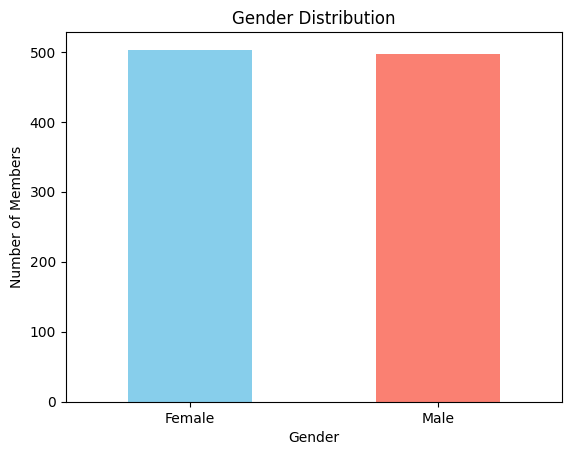

In [23]:
#gender distribution
gender_counts = df['gender'].value_counts()

gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Members")
plt.xticks(rotation=0)
plt.show()

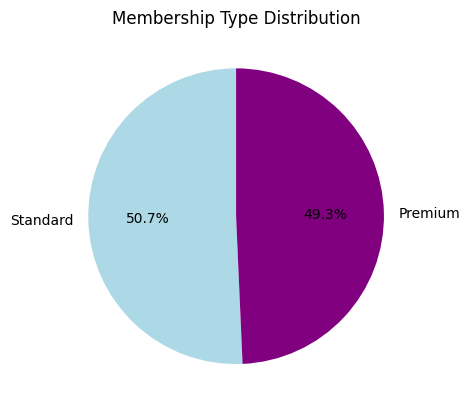

In [24]:
#Membership Type Distribution
membership_counts = df['abonoment_type'].value_counts()

membership_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'purple']
)

plt.title("Membership Type Distribution")
plt.ylabel("")  # Hides default ylabel
plt.show()


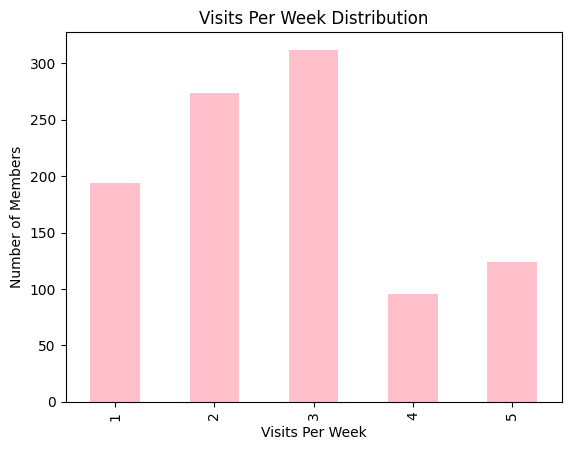

In [25]:
#visit_per_week
visit_counts = df['visit_per_week'].value_counts().sort_index()

visit_counts.plot(kind='bar', color='pink')
plt.title("Visits Per Week Distribution")
plt.xlabel("Visits Per Week")
plt.ylabel("Number of Members")
plt.show()


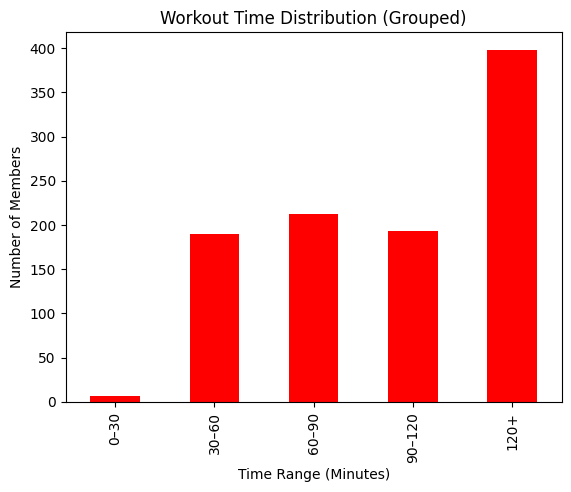

In [26]:
#Avg time spent in gym
avg_time_minutes = df['avg_time_in_gym'].dt.total_seconds() / 60

bins = [0, 30, 60, 90, 120, 180]
labels = ['0–30', '30–60', '60–90', '90–120', '120+']

time_groups = pd.cut(avg_time_minutes, bins=bins, labels=labels)
time_groups.value_counts().sort_index().plot(kind='bar', color='red')

plt.title("Workout Time Distribution (Grouped)")
plt.xlabel("Time Range (Minutes)")
plt.ylabel("Number of Members")
plt.show()

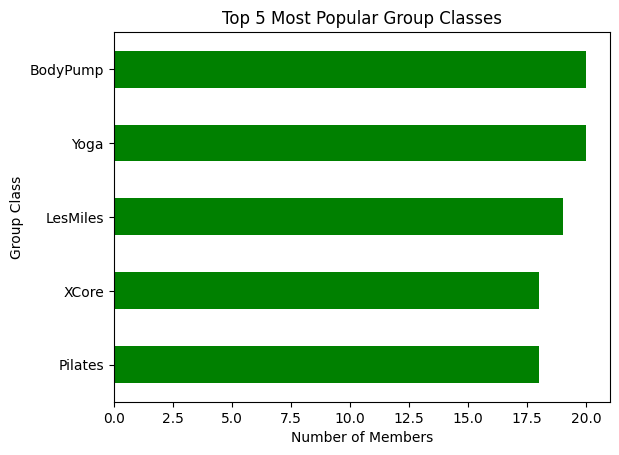

In [27]:
#Most popular group class
top_classes = df['fav_group_lesson'].value_counts().head(5)

plt.figure()
top_classes.sort_values().plot(kind='barh',color='Green')
plt.title("Top 5 Most Popular Group Classes")
plt.xlabel("Number of Members")
plt.ylabel("Group Class")
plt.show()

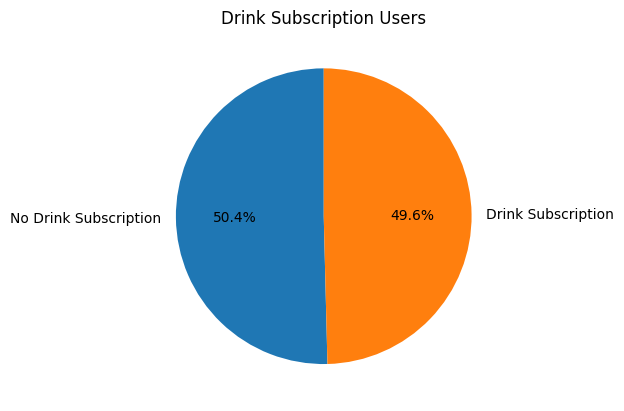

In [28]:
#Drink Subscription Users
drink_counts = df['drink_abo'].value_counts()

plt.figure()
plt.pie(
    drink_counts,
    labels=['No Drink Subscription', 'Drink Subscription'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Drink Subscription Users")
plt.show()

## **Engagement Level**

In [29]:
df["engagement_level"] = pd.qcut(
    df["consistency_score"],
    q=3,
    labels=["Low", "Medium", "High"]
)


## **Statistical Test**

In [30]:
pt_yes = df[df["personal_training"] == True]["avg_time_minutes"]
pt_no = df[df["personal_training"] == False]["avg_time_minutes"]

ttest_ind(pt_yes, pt_no)


TtestResult(statistic=np.float64(0.6453879902743663), pvalue=np.float64(0.5188241280668484), df=np.float64(998.0))

## **Customer segmentation**

In [31]:
features = df[["visit_per_week", "avg_time_minutes", "Age"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df["segment"] = kmeans.fit_predict(scaled_features)


## **Segment visualization**

In [34]:
segment_avg_time = (
    df.groupby("segment")["avg_time_minutes"]
    .mean()
    .reset_index()
)



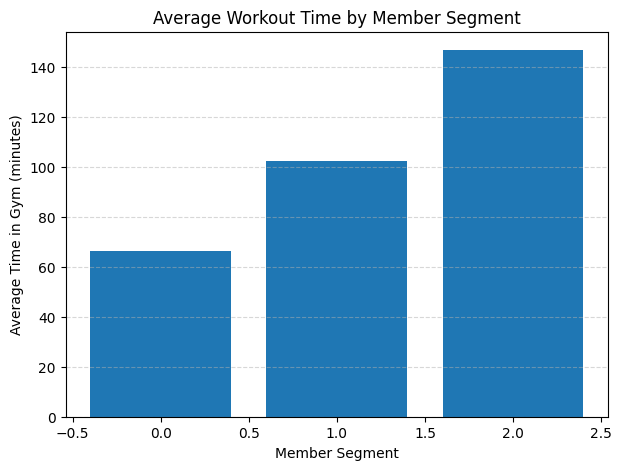

In [35]:
plt.figure(figsize=(7,5))

plt.bar(
    segment_avg_time["segment"],
    segment_avg_time["avg_time_minutes"]
)

plt.title("Average Workout Time by Member Segment", fontsize=12)
plt.xlabel("Member Segment", fontsize=10)
plt.ylabel("Average Time in Gym (minutes)", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()



## **Predictive model**

In [36]:
df["high_value_member"] = (df["engagement_level"] == "High").astype(int)

X = df[["visit_per_week", "avg_time_minutes", "Age"]]
y = df["high_value_member"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.9433333333333334